In [1]:
import yfinance as yf
from datetime import date
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## function to import data online

In [2]:
def get_data(symbols, start_date, end_date):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    date_range = pd.date_range(start=start_date, end=end_date)
    df = pd.DataFrame(index=date_range)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # Use yfinance to fetch historical data
        df_temp = yf.download(symbol, start=start_date, end=end_date)
        
        # Rename the 'Close' column to the symbol name
        df_temp.rename(columns={'Close': symbol}, inplace=True)
        
        # Concatenate the data to the main DataFrame
        df = pd.concat([df, df_temp[symbol]], axis=1, sort=False)

    # Drop rows where SPY did not trade
    df.dropna(subset=['SPY'], inplace=True)
    
    return df


## Some more functions to plot and calculate

In [3]:
def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

    

def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    daily_returns = df.pct_change()
    daily_returns.iloc[0, :] = 0
    return daily_returns
    # Note: Returned DataFrame must have the same number of rows

def compute_cumulative_returns(df):
    return ((df / df.iloc[0].values) - 1)

def normalized_stock(df):
    return df/df.iloc[0, :]



## data frame visualization

In [4]:
#dates = pd.date_range('2023-01-01', '2023-09-15')  # one month only
#symbols = ['SPY','AAPL', 'GOOG', 'AMD', 'AMZN', 'NVDA', 'TSLA', 'MSFT', 'META']
symbols = ['SPY', 'ASML', 'META', 'AMZN', 'BABA', 'GOOGL', 'NXPI']
df = get_data(symbols, '2018-01-01', date.today())
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,SPY,ASML,META,AMZN,BABA,GOOGL,NXPI
2018-01-02,268.769989,177.729996,181.419998,59.450500,183.649994,53.660500,117.949997
2018-01-03,270.470001,179.080002,184.669998,60.209999,184.000000,54.576000,118.080002
2018-01-04,271.609985,180.750000,184.330002,60.479500,185.710007,54.787998,117.870003
2018-01-05,273.420013,182.869995,186.850006,61.457001,190.699997,55.514500,118.050003
2018-01-08,273.920013,183.830002,188.279999,62.343498,190.330002,55.710499,118.279999
...,...,...,...,...,...,...,...
2023-12-22,473.649994,752.530029,353.390015,153.419998,75.279999,141.490005,228.949997
2023-12-26,475.649994,762.679993,354.829987,153.410004,75.849998,141.520004,231.949997
2023-12-27,476.510010,764.030029,357.829987,153.339996,76.110001,140.369995,232.100006
2023-12-28,476.690002,757.849976,358.320007,153.380005,77.239998,140.229996,231.070007


## data plotting

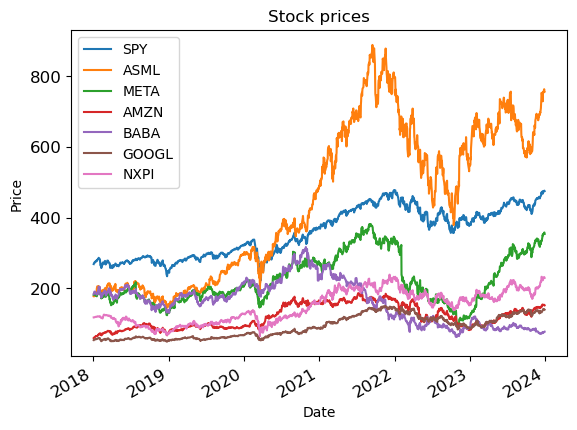

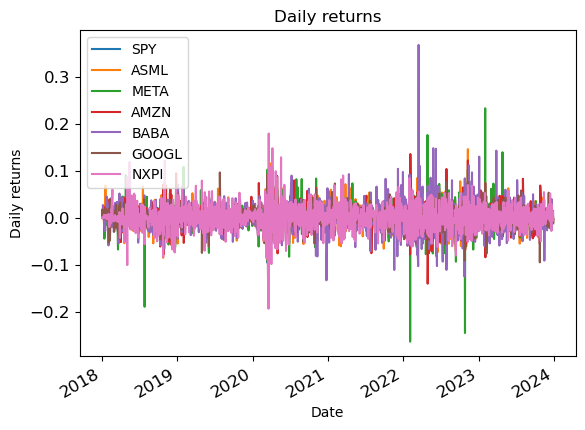

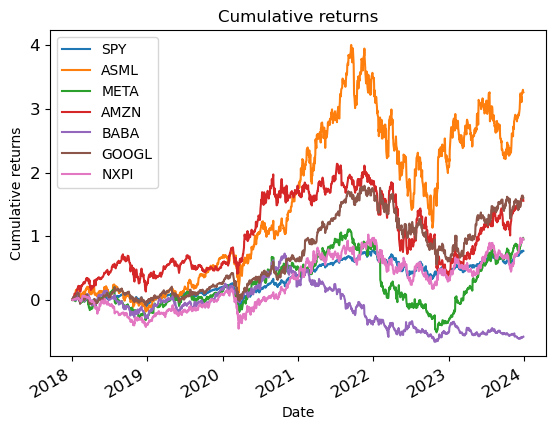

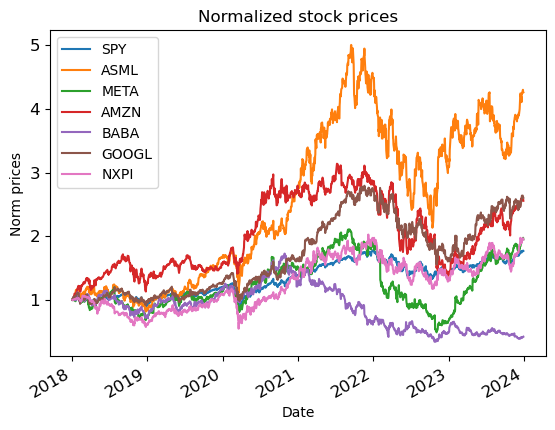

In [5]:


def test_run():
    
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
    cumu_returns = compute_cumulative_returns(df)
    plot_data(cumu_returns, title="Cumulative returns", ylabel="Cumulative returns")
    
    norm_stock = normalized_stock(df)
    plot_data(norm_stock, title="Normalized stock prices", ylabel="Norm prices")


if __name__ == "__main__":
    test_run()
